<a href="https://colab.research.google.com/gist/oserikov/f430e81939ffff48cafd6377b9e67b9c/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание о векторизации текстов

В задании вам предстоит сравнить несколько методов снижения размерности
* PCA
* t-SNE

а так же попробовать осуществить тематическое моделирование методом LDA.

**Формат сдачи задания** -- указание в гуглформе ссылки на тетрадь с решением + ответ на вопросы (см. последние вопросы первой задачи) в форме. Форма появится ближе к дедлайну.

**Дедлайн** 23.59 7 октября MSK.  

ДЗ предполагает возможность получения **до 12 баллов** по десятибалльной шкале. Оценки 11 и 12 поступают в ведомость, как оценки 11 и 12.

---

Если вы уже хорошо знакомы с снижением размерности, реализуйте первую задачу, используя не Bag-of-Words векторы текстов, а эмбеддинги текстов, полученные алгоритмом на ваш выбор. 
**Если вы собираетесь решать задачу так, то, приступая, сообщите об этом @oserikov в телеграме.**

Если вы уже хорошо знакомы ещё и с векторизацией текстов эмбеддингами, напишите @oserikov для обсуждения замены первой задачи на другую.


# [6 баллов] Задача о снижении размерности




[Вот](https://drive.google.com/drive/folders/1HX5rz4UZHtbzhPguUFolOg-xm6HFc0KO?usp=sharing) корпус, однажды собранный без особенных размышлений.
Это -- корпус любительской литературы. Он был собран для забавы и непонятно, какая природа у представленных там текстов.

Вам предстоит оценить, насколько эти тексты интересны в качестве простого датасета для задачи классификации: информативны ли Bag-of-Words векторы в смысле разделения текстов по жанрам.

---

### Постановка задачи

**Задача**: взяв фанифики и два каких-то других жанра из корпуса, визуализировать их BoW-представления на плоскости.

---

Визуализацию стоит осуществлять scatter-плотом, информацию о принадлежности документа какому-то жанру стоит передавать цветом.

Количество документов, представляющих каждый жанр, стоит подобрать семплированием нужного количества элементов под доступные вычислительные ресурсы -- полный корпус точно слишком велик.

Гиперпараметры BoW-векторизатора стоит подобрать под доступные вычислительные ресурсы -- если код работает дольше часа, то стоит упростить вычислительную задачу: подобрать другие гиперпараметры векторизации или уменьшить выборку.

#### Критерии


* **1 БАЛЛ**: 
  * В выбранных документах осуществлена какая-то **стандартная предобработка текста**: удалены стоп-слова и мусорные токены (e.g. html-теги), проведена лемматизация.  
  Решение о каждой конкретной детали предобработки остаётся на усмотрение студентов: каждое нестандартное действие (e.g. отказ от лемматизации или удаление каких-то особенных токенов) стоит пояснить коротким комментарием, описывающим мотивацию.
  * Получены **Bag-of-Words векторы** документов, выбранных для исследования. 
* **1 БАЛЛ**: получена визуализация документов на плоскости **методом главных компонент** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: получена визуализация документов на плоскости методом **t-SNE** снижения размерности Bag-of-Words векторов.
* **1 БАЛЛ**: на полученных визуализациях **получилось передать цветом точек классы** документов; понятно, точка какого цвета относится к какому классу.


Скорее всего визуализация t-SNE и PCA заметно отличаются раскладкой точек по плоскости: один метод как будто раскладывает их вдоль двух пересекающихся прямых, за другим такого свойства скорее всего нет. Ответ на два вопроса ниже вам предстоит указать в гуглформе, сдавая задание.
* **1 БАЛЛ**: верно указано, какой метод укладывает точки примерно вдоль прямых, а какой -- нет
* **1 БАЛЛ**: предложено верное описание тому, почему у одного из методов всегда результаты располагаются вдоль некоторых прямых. 



0. выбор текстов

In [16]:
import os
import numpy as np
import pandas as pd

In [166]:
for category in categories:
    folder = './corpora_'+category
    text_list = os.listdir(folder)
    print(category, len(text_list))

children 1007
fanfiction 504
religion 504


In [178]:
# words = []

# for category in categories:
#     folder = './corpora_'+category
#     text_list = os.listdir(folder)
#     SEED = SEED+1
#     np.random.seed(SEED)
#     indexes = np.random.choice(len(text_list), 150, replace=False)
#     for i in indexes:
#         filename = text_list[i]
#         with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
#             try:
#                 text = f.read()
#                 words.append(len(tokenizer(text).split(' ')))
#             except:
#                 continue
                
# words.sort()
# print(words)

[5, 6, 11, 11, 12, 14, 14, 17, 23, 25, 32, 34, 35, 35, 36, 42, 43, 55, 55, 55, 55, 57, 64, 66, 71, 72, 74, 75, 77, 78, 78, 85, 90, 91, 93, 100, 100, 100, 101, 104, 112, 112, 121, 123, 130, 136, 139, 144, 160, 169, 172, 175, 178, 179, 182, 184, 186, 192, 202, 205, 231, 244, 249, 260, 262, 265, 273, 284, 285, 294, 299, 302, 318, 343, 347, 357, 358, 359, 380, 392, 403, 416, 421, 423, 424, 425, 432, 446, 467, 505, 529, 541, 542, 553, 556, 581, 601, 607, 612, 612, 620, 647, 655, 670, 672, 681, 685, 685, 711, 720, 724, 745, 746, 764, 773, 790, 795, 841, 845, 857, 876, 878, 908, 910, 915, 970, 981, 1027, 1062, 1104, 1105, 1128, 1131, 1183, 1189, 1195, 1206, 1216, 1222, 1226, 1250, 1262, 1266, 1273, 1274, 1282, 1380, 1413, 1424, 1428, 1449, 1482, 1491, 1495, 1511, 1560, 1601, 1619, 1622, 1633, 1683, 1726, 1744, 1752, 1794, 1801, 1802, 1836, 1877, 1889, 1891, 1913, 1950, 1963, 1974, 1993, 2000, 2002, 2011, 2016, 2076, 2085, 2085, 2093, 2140, 2144, 2169, 2179, 2186, 2204, 2219, 2220, 2221, 2261,

In [87]:
categories = ['children', 'fanfiction', 'religion']
data_samples = pd.DataFrame(columns=['genre', 'filename', 'text'])
SEED = 37

for category in categories:
    folder = './corpora_'+category
    text_list = os.listdir(folder)
    SEED = SEED+1
    np.random.seed(SEED)
    indexes = np.random.choice(len(text_list), 150, replace=False)
    for i in indexes:
        filename = text_list[i]
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
            try:
                text = f.read()
            except:
                continue
        data_samples = data_samples.append({'genre': category,
                             'filename': filename.replace('.txt', ''),
                             'text': text}, 
                            ignore_index=True)
data_samples.head(10)

,genre,filename,text
0,children,denizhenko_s_wmsworddoc-100,\n\n\n\n\n\n\n\n\n\n\nАвгустовский ветер шалов...
1,children,pinskij_dmitrij_tomasowich2035,\n\nДоспехи Зреющего Мага.\n-\nЗвериные игры\n...
2,children,dawydowa_o_smlin,"\n\n Чому людей лякає це просте слово “млин,”..."
3,children,dubina_n_nm-sky,\nМы живём на последнем этаже. Вот бы всё пере...
4,children,kaban_p03_chapter1,\n\n \n \n\n\n\n\n\n\n\n\n Монстр стоял не дал...
5,children,jazewa_mfelix2,\n\n\n\n\n\n\n\n\n ДЕВОЧКА НЮША И ...
6,children,zuewgorxkowskij_a_lveselieistorii-12,\n\n\n\n\n \n \n\n\n\n \n Бесконечная круговор...
7,children,wrochek_s011kafka,\nВасилиса продолжает свои литературные изыска...
8,children,lushin_a_wkamenx,\n\n\n\n\n\n\n\n\n\n\nКамень \nУдар!\nОн прише...
9,children,akimowa_g_wdenxmateri,\nДень мамы.\n\nТучки солнышко закрыли\nДождик...


In [88]:
data_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 3 columns):
genre       449 non-null object
filename    449 non-null object
text        449 non-null object
dtypes: object(3)
memory usage: 10.6+ KB


1.1 стандартная предобработка текста

In [89]:
import re
from razdel import tokenize
from nltk.corpus import stopwords
stops = stopwords.words("russian")

from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

from tqdm.auto import tqdm
tqdm.pandas()

In [90]:
def tokenizer(text_data):
    tokens = [_.text for _ in list(tokenize(str(text_data).lower())) if not re.search('[^а-яА-ЯёЁa-zA-z]', _.text)]
    return " ".join(tokens)

def lemmatizer(tokens):
    lem_text = []
    for word in tokens.split(" "):
        lem = morph.parse(word)[0].normal_form
        if lem not in stops:
            lem_text.append(lem)
    return ' '.join(lem_text)

In [91]:
data_samples['token'] = data_samples['text'].progress_apply(tokenizer)
data_samples.head(5)

,genre,filename,text,token
0,children,denizhenko_s_wmsworddoc-100,\n\n\n\n\n\n\n\n\n\n\nАвгустовский ветер шалов...,августовский ветер шаловливо перебирал листьям...
1,children,pinskij_dmitrij_tomasowich2035,\n\nДоспехи Зреющего Мага.\n-\nЗвериные игры\n...,доспехи зреющего мага звериные игры известны м...
2,children,dawydowa_o_smlin,"\n\n Чому людей лякає це просте слово “млин,”...",чому людей це просте слово млин яке сонцем дух...
3,children,dubina_n_nm-sky,\nМы живём на последнем этаже. Вот бы всё пере...,мы живём на последнем этаже вот бы всё перевер...
4,children,kaban_p03_chapter1,\n\n \n \n\n\n\n\n\n\n\n\n Монстр стоял не дал...,монстр стоял не дальше чем на расстоянии вытян...


In [92]:
data_samples['lemm'] = data_samples['token'].progress_apply(lemmatizer)
data_samples.head(5)

,genre,filename,text,token,lemm
0,children,denizhenko_s_wmsworddoc-100,\n\n\n\n\n\n\n\n\n\n\nАвгустовский ветер шалов...,августовский ветер шаловливо перебирал листьям...,августовский ветер шаловливо перебирать лист г...
1,children,pinskij_dmitrij_tomasowich2035,\n\nДоспехи Зреющего Мага.\n-\nЗвериные игры\n...,доспехи зреющего мага звериные игры известны м...,доспех зреть маг звериный игра известный мальч...
2,children,dawydowa_o_smlin,"\n\n Чому людей лякає це просте слово “млин,”...",чому людей це просте слово млин яке сонцем дух...,чома человек це прост слово млина як сонец дух...
3,children,dubina_n_nm-sky,\nМы живём на последнем этаже. Вот бы всё пере...,мы живём на последнем этаже вот бы всё перевер...,жить последний этаж весь перевернуть вверх ног...
4,children,kaban_p03_chapter1,\n\n \n \n\n\n\n\n\n\n\n\n Монстр стоял не дал...,монстр стоял не дальше чем на расстоянии вытян...,монстр стоялый далёкий расстояние вытянутый яз...


In [184]:
# # data_samples.drop(columns=['text']).to_csv('corpora_lemmatized.tsv', sep='\t')
# test_data = pd.read_csv('corpora_lemmatized.tsv', sep='\t')
# def count_words(lemm):
#     try:
#         l = len(lemm.split(' '))
#         return l
#     except:
#         print(lemm)

# test_data['words'] = test_data['lemm'].apply(count_words)
# print(test_data['words'].sum())
# test_data['words'].sort_values(ascending=False)[:10]

nan
3582033.0


273    334716.0
228    176107.0
212    153742.0
243    127141.0
37     107009.0
241     89046.0
335     83798.0
155     75289.0
380     67703.0
351     56847.0
Name: words, dtype: float64

1.2  Bag-of-Words векторы документов

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
vectorizer = TfidfVectorizer(analyzer=str.split, 
                             max_df=0.98,
                             min_df=5,
                             max_features=15000)
corpora = data_samples['lemm']
vectores = vectorizer.fit_transform(corpora)
vectores.shape

(449, 15000)

2. визуализация документов на плоскости двумя методами

In [135]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [157]:
def get_colors(genre):
    if genre == 'children': 
        return '#0038A8'
    elif genre == 'fanfiction':
        return '#9B4F96'
    else:
        return '#D60270'

colors = data_samples['genre'].apply(get_colors)

pop_ch = mpatches.Patch(color='#0038A8', label='children')
pop_ff = mpatches.Patch(color='#9B4F96', label='fanfiction')
pop_rg = mpatches.Patch(color='#D60270', label='religion')

In [153]:
pca = PCA(n_components=2).fit_transform(vectores.todense())
pca.shape

(449, 2)

In [147]:
tsne = TSNE().fit_transform(vectores.todense())
tsne.shape

(449, 2)

In [148]:
# просто для сравнения
pca_tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(vectores.todense()))
pca_tsne.shape

(449, 2)

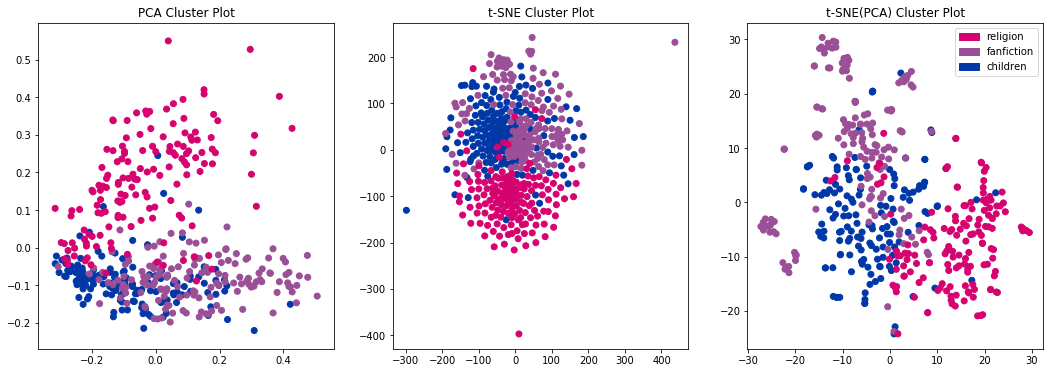

In [164]:
f, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].scatter(pca.T[0], pca.T[1], c=colors)
ax[0].set_title('PCA Cluster Plot')

ax[1].scatter(tsne.T[0], tsne.T[1], c=colors)
ax[1].set_title('t-SNE Cluster Plot')

ax[2].scatter(pca_tsne.T[0], pca_tsne.T[1], c=colors)
ax[2].set_title('t-SNE(PCA) Cluster Plot')

plt.legend(handles=[pop_rg,pop_ff, pop_ch])
plt.show()

3. точки примерно вдоль прямых укладывает PCA, т.к. это скорее проекция точек многомерного пространства на новое n=2-мерное (в даном случае, т.е. на новые оси), а t-SNE динамически учитывает взаиморасположение точек, т.е. первый как бы работает от всей совокупности сразу, а второй принимает во внимание отностительное расположение и плотность участков.

#### Примеры кода

Использование t-SNE и PCA для визуализации векторов: [ссылка](https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans).





## [6 баллов] Задача о тематическом моделировании



### об LDA




### Постановка задачи
Загрузите [коллекцию писем Х. Клинтон](https://www.kaggle.com/kaggle/hillary-clinton-emails/?select=Emails.csv) с kaggle. Для скачивания может потребоваться регистрация.

Методом LDA выделите несколько тем в переписке Х. Клинтон, дайте им словесное описание. Используйте библиотеку LdaModel из gensim.

#### Критерии

* **2 БАЛЛА**: получены списки ключевых слов, не выглядящие бессмыслицей
* **2 БАЛЛА**: осуществлена визуализация библиотекой pyLDAvis
* **1 БАЛЛ**: предложено осмысленное текстовое описание большинства выделенных тем.
* **1 БАЛЛ**: проведено сравнение LDA, запущенного на CountVectorizer и TfIdfVectorizer предтавлениях одних и тех же данных. 

#### примеры кода

Пример обучения LdaModel на выдаче CountVectorizer: [ссылка](https://github.com/EricSchles/sklearn_gensim_example/blob/master/example.py)

Пример использования pyLDAvis: секция 15 [по ссылке](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

---

Для обучения *LdaModel* и её последующей визуализации потребуется словарь формата gensim. Словарь формата gensim удобно получать из сжатого csc_matrix-представления нашего векторизованного текста: как многие замечали на паре, tf-idf векторы содержат много нулей.

```python
import gensim
from scipy.sparse import csc

corpus = gensim.matutils.Sparse2Corpus(csc.csc_matrix(X))
dictionary = gensim.corpora.Dictionary.from_corpus(corpus, vocab_dict)
```

где *corpora* содержит полученное с помощью gensim представление коллекции, а *vocab_dict* — это dict, полученный после работы Vectorizer, ставящий в соответствие каждому номеру строки в матрице данных само слово в виде строки.

__ToTry__: взять keywords одного топика, получить усредненное значение их эмбедингов (более продвинуто - учитывать веса из модели), найти ближайщего соседа этого усредненного значения => автоматически получить топик в 1 слово (более продвинуто - получить в несколько и сравнить с человеческой разметкой)

_Полянская Анна, БКЛ171_